<a href="https://colab.research.google.com/github/wonyoung-ji/study/blob/master/kaggle/kaggle_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.데이터 준비 및 모듈 임포트

In [169]:
# 기본 데이터 정리 및 처리
import numpy as np
import pandas as pd

# 시각화
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno  #결측치 시각화 함수

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

# 경고 제거
import sys
import warnings
warnings.filterwarnings('ignore')

## CSV to DF

In [170]:
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [171]:
import io
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
train = pd.read_csv(io.BytesIO(uploaded['train.csv']))

## 데이터프레임을 보는 다양한 방법

In [172]:
train.head()
# train.head(5)
# train.head(n=5)
# train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [173]:
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [174]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Eustis, Miss. Elizabeth Mussey",male,NaN,NaN,NaN,1601,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [175]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


describe(): 연속된 값을 가진 열만 통계적인 면을 보여주나, include = 'all'로 세팅하면 모든 열을 출력

In [176]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

dtype: series형태이기 때문에 dtype()으로 출력시 error 발생.  
 즉, ()를 넣는다는 것은 각 행의 값들이 있어야 하는데, dtype은 이러한 형태가 아니므로 call할 수가 없다. 

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


info(): dtypes의 좀 더 발전된 개념. 데이터 타입뿐만 아니라, 빈칸이 아닌 개수까지 보여줌

In [178]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

columns: 데이터 프레임의 열의 제목들을 출력

In [179]:
train[5:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S


In [180]:
train.shape

(891, 12)

# 2.파일 병합
- ntrain과 ntest의 shape를 확보 (병합한 것을 나중에 다시 갈라 놓기 위한 준비)
- y_train은 알려진 결과값이므로 따로 준비
- 테스트의 승객 아이디는 나중에 최종결과에 넣을 것이므로 따로 분할
- train과 test를 병합하여 data로 만듦.
(문자로 된 것을 숫자로 바꾸거나, 숫자를 interval 별로 그룹화하거나 등을 위해 합 해 놓음)


In [181]:
# 병합준비
ntrain = train.shape[0]
ntest = test.shape[0]

# y_train은 따로 모셔놓기
y_train = train['Survived'].values
passid = test['PassengerId']

# 병합 파일 만들기
data = pd.concat((train, test))

# 데이터행과 열의 크기는
print("data size is {}".format(data.shape))

data size is (1309, 12)


In [182]:
# ntrain의 생김새
ntrain

891

In [183]:
# ntest의 생김새
ntest

418

In [184]:
y_train

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [185]:
passid

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [186]:
# train과 test를 합친 data
# test에서 'Survived'는 빈칸을 나타내는 NaN(Not a Number)를 보여줌
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [187]:
# format을 위한 간단한 연습
print("I like {}".format('eggs'))
print("I like {0} and {1}".format('eggs','spam'))
print("I like {1} and {0}".format('eggs','spam'))

I like eggs
I like eggs and spam
I like spam and eggs


# 3.파일 탐색

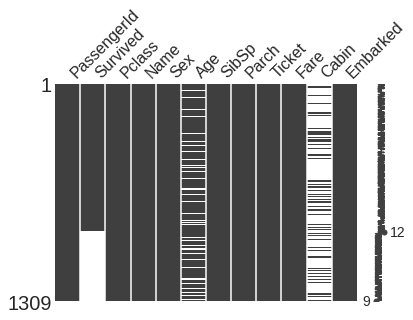

In [188]:
missingno.matrix(data,figsize=(6,4))

위 도표를 통해 빈 값을 직과적으로 확인 가능.  
아래 Survived가 비어 있는 것은, 테스트에 답으로 예측해야하는 부분이기 때문

In [189]:
data.isnull().sum() # 비어 있는 값 체크

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [190]:
data.isnull().any()

PassengerId    False
Survived        True
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked        True
dtype: bool

data.isnull().any() - 각 컬럼별 빈값이 있는지 없는지 (=isna를 써도 같음)  
data.isnull().sum() - 전체 각 항목 중 빈칸이 몇 개나 있는지  
data.isnull().any().any() - 전체에 빈값이 있는지 없는지

In [191]:
data.Age.isnull().any()

True

In [192]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

- Feature 항목
  + __범주형 항목 (Categorical Features)__  
  둘 이상의 결과 요소가 있는 변수. 해당 기능의 각 값을 범주별로 분류 가능  
  ex) 성별(남성, 여성)  
  이산형 변수(discrete variable) = 범주형 변수(categorical variable) = 명목변수  
  데이터 셋에서 명목 항목 = Sex, Embark  
  Name, Ticket 등을 이로 변환해야 함
  + __Ordinal Variable__  
순위 변수. 범주형의 하나이지만, 값 사이의 상대 순서(=서열) 또는 정렬이 가능함  
데이터 셋에서 순위 항목: PClass  
Cabin을 이 범주로 변환해야 함  
  + __연속형 항목(Continuous Features)__  
서로 연속된 값을 가진 변수를 가진 항목. 연령이 대표적임  
Age, SipSp, Parch, Fare는 interval variable로 변환해야 함

* 열의 이름

          Variable          정의                Key

          survival          생존 여부            0 = No, 1 = Yes

          pclass            선실 등급            1 = 1st, 2 = 2nd, 3 = 3rd

          sex               성별    

          Age               나이  

          sibsp             형재 자매의 수/ 배우자 등이 승선한 경우 수    

          parch             부모나 자식과 같이 탄 경우 수   

          ticket            표 번호    

          fare              요금

          cabin             선실 번호   

          embarked          승선한 항구         C = Cherbourg, Q = Queenstown, S = Southampton


# 4.데이터 탐구(Exploratory Data Analysis)

In [193]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Co-relation 매트릭스 = 변수간 상관계수를 보여주는 seaborn 시각화 표  
표의 각 셀은 두 변수간 상관관계를 표현  
고급분석에 대한 진단으로 데이터를 요약하는 데 사용  
- 마스크 셋업: 0으로 행렬을 상관 행렬과 같은 모양으로 만든 후, 불리안 값을 넣어 이를 True만으로 만듦  
- triu = 우측 상단 삼각행렬
- annot = True는 각 셀에 숫자 표시.  False는 각셀에 미표시.  
- 이어서 이를 heatmap으로 런칭

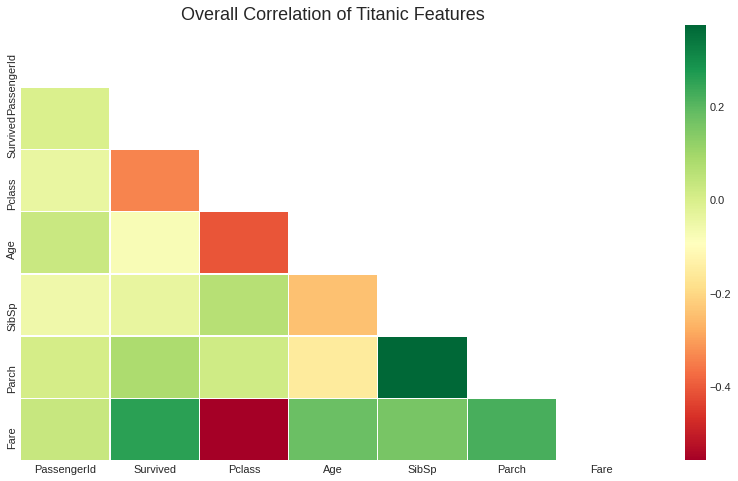

In [194]:
# Co-relation 매트릭스
corr = data.corr()

# 마스크 셋업
mask = np.zeros_like(corr,dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 그래프 셋업
plt.figure(figsize=(14,8))
# 그래프 타이틀
plt.title('Overall Correlation of Titanic Features', fontsize = 18)

# Co-relation 매트릭스 런칭
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn',linewidth=0.2, annot_kws={'size':20})
plt.show()

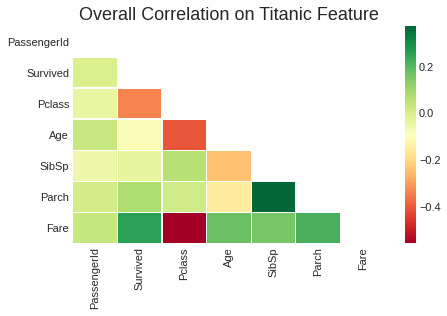

In [195]:
# Co-relation 매트릭스
corr = data.corr()
# 변수 corr에 data 데이터셋의 상관계수를 만드는 함수 .corr()을 붙여 할당

# 마스크 셋업
mask = np.zeros_like(corr, dtype=np.bool)
# 여기에 0으로 된 매트릭스를 마스크에 붙임. 모양을 만드는 것
# corr에서 관계 숫자는 만들어졌고, mask는 같은 모양의 매트릭스를 만들었는데, 모두 0이 아니므로 False로 뜸
mask[np.triu_indices_from(mask)] = True

# 그래프 셋업
plt.figure(figsize=(7,4))
plt.title('Overall Correlation on Titanic Feature',fontsize = 18)
sns.heatmap(corr, mask=mask, annot=False, cmap='RdYlGn', linewidth=0.2, annot_kws={'size':20})
plt.show()

- "Survived" 분석  
0 = Not survived  
1 = Survived  
Categorical Variable(죽던지 살던지 둘 중 하나)  
countplot을 그려본다  
사이즈는 가로 10, 세로 2  
생존여부 0과 1의 숫자를 세어 본 후 그림을 그리도록 명령  
pyplot(plt)의 figure라는 메소드를 써서 그림판의 크기를 정하고, seaborn의 카운트 플롯을 그림

0    549
1    342
Name: Survived, dtype: int64


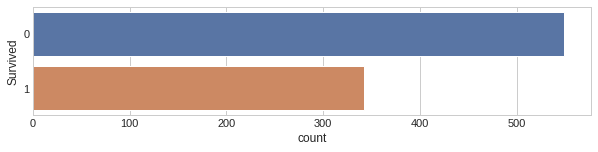

In [196]:
fig = plt.figure(figsize=(10,2))
sns.countplot(y='Survived',data=train)
print(train.Survived.value_counts())

- 사망자 훨씬 많음  
전체 사망자 비율 확인 필요  
파이그래프, 카운트 플롯을 서브 플롯으로 출력  
행은 하나, 열은 2개의 서브 플롯  
사이즈는 가로 15, 세로 6인치  
'Survived'의 값을 카운트해서 파이플롯 생성  
- explode: 폭발하는 것이므로 1이면 튀어 나감, 0을 주면 분리만 되고 돌출은 되지 않음(0=미분리, 1=분리 의미)  
- autopercent: 1.1이 표현하는 부분은 소수점 한 자리까지 표시한다는 의미. 점 이하가 4이면 둘 다 소수점 4자리수까지 출력  
- ax[0]은 첫번째 칸
- set_title 메소드는 서브플롯의 제목 표출



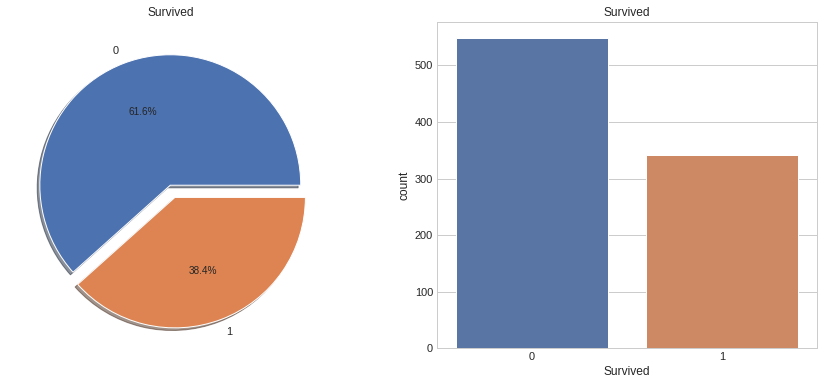

In [197]:
f,ax = plt.subplots(1,2,figsize=(15,6))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=train, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

위의 절차를 아래와 같이 함수로 형성

In [198]:
def piecount(col):
  f, ax = plt.subplots(1,2,figsize=(15,6))
  train[col].value_counts().plot.pie(explode=[0.1 for i in range(train[col].nunique())], autopct='%1.1f%%', ax=ax[0],shadow=True)
  ax[0].set_title(col)
  ax[0].set_ylabel('')
  sns.countplot(col,data=train, ax=ax[1])
  ax[1].set_title(col)
  plt.show()

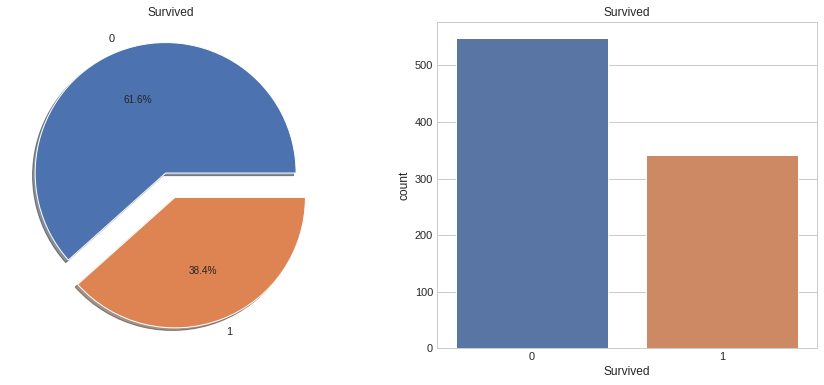

In [199]:
piecount('Survived')

## Pclass 분석
- Pclass는 값이 숫자이나 서열이 정해진 Ordinal Feature
- Key: 1 = 1st, 2 = 2nd, 3 = 3rd
- 각 클래스 당 생존자 수

In [200]:
train.groupby(['Pclass','Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [201]:
pd.crosstab(train.Pclass, train.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


1등급 - 객실의 사람들은 생존자가 더 많음  
2등급 - 생존자에 비해 사망자가 조금 더 많음  
3등급 - 사망자가 3배 이상 많음

In [202]:
train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


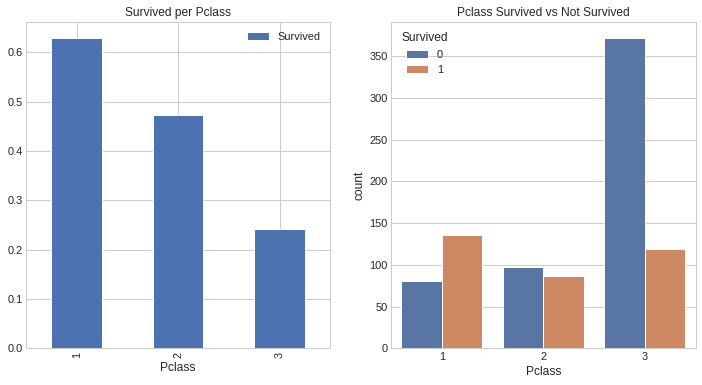

In [203]:
f, ax = plt.subplots(1,2,figsize=(12,6))
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived per Pclass')
sns.countplot('Pclass',data=train, hue='Survived',ax=ax[1])
ax[1].set_title('Pclass Survived vs Not Survived')
plt.show()

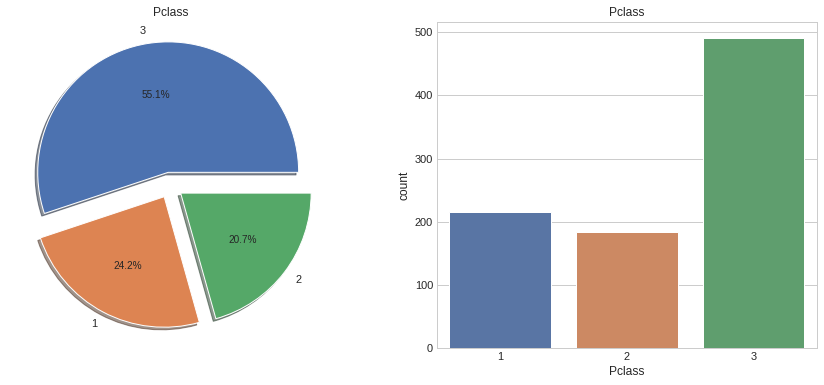

In [204]:
piecount('Pclass')

%는 3등칸이 반이나 넘으나, 위의 그래프에서 생존자는 1등석이 가장 많다는 것을 알 수 있음  
각 클래스 당 생존률은?

## Name 분석
- 이름은 다를 가능성이 매우 큼
- 분류 실시

In [205]:
data.Name.value_counts()

Connolly, Miss. Kate                              2
Kelly, Mr. James                                  2
Barbara, Miss. Saiide                             1
Masselmani, Mrs. Fatima                           1
Brown, Mrs. John Murray (Caroline Lane Lamson)    1
                                                 ..
Moussa, Mrs. (Mantoura Boulos)                    1
White, Mr. Richard Frasar                         1
de Brito, Mr. Jose Joaquim                        1
Vande Walle, Mr. Nestor Cyriel                    1
Ford, Miss. Doolina Margaret "Daisy"              1
Name: Name, Length: 1307, dtype: int64

- 호칭(Mr, Ms 등)을 보아야 함
- "Initial"이란 열을 새로 생성하여, Name에서 추출한 Regular Expression을 추가
- str.extract('([A-Za-z]+).'): str에서 대문자,소문자 중에 .명령을 통해, .으로 끝나는 부분 추출
- ('^[A-Za-z]+)'): 처음에 나오는 문자 덩어리. +을 빼면 첫 스펠링 한 캐릭터만 추출

In [206]:
temp = data.copy()
temp['Initial'] = 0
temp['Initial'] = data.Name.str.extract('([A-Za-z0-9]+)\.')

Miss, Mr는 많이 등장  
그 외 익숙하지 않은 몇 개도 존재

In [207]:
temp['Initial'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Don           1
Countess      1
Sir           1
Capt          1
Jonkheer      1
Lady          1
Mme           1
Dona          1
Name: Initial, dtype: int64

성별로 구분

In [208]:
pd.crosstab(temp.Initial, temp.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0
male,1,4,0,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1


생존률 함수 생성하여 생존률 확인  

In [209]:
def survpct(col):
  return temp.groupby(col)['Survived'].mean()

In [210]:
survpct('Initial')

Initial
Capt        0.000000
Col         0.500000
Countess    1.000000
Don         0.000000
Dona             NaN
Dr          0.428571
Jonkheer    0.000000
Lady        1.000000
Major       0.500000
Master      0.575000
Miss        0.697802
Mlle        1.000000
Mme         1.000000
Mr          0.156673
Mrs         0.792000
Ms          1.000000
Rev         0.000000
Sir         1.000000
Name: Survived, dtype: float64

생존숫자로 확인


test에 있는 Dona의 나이를 보고, 어디에 넣을지 결정  
Ms.는 현대의 Miss + Mrs.를 합친 게 아닌, 당시 귀족미망인 의미  
Mile, Mme 등도 마드모아젤과 마담의 줄인말. 즉, 귀족여성으로 분류

In [211]:
temp['LastName'] = data.Name.str.extract('([A-Za-z]+)')

In [212]:
pd.crosstab(temp.LastName, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial에서 Mr. 등의 호칭 뽑아내고, 성을 뽑아냄  
머신에 적용하기 위해 알파벳을 숫자로 변환  
Dona 처리

In [213]:
temp.loc[temp['Initial']=='Dona']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9,C105,C,Dona,Oliva


나이로 추측하여 Mrs.로 분류  
결측치가 하나일 경우, 가장 적절한 추축을 사용하여 넣는 것도 좋은 방법 

In [214]:
temp.loc[temp['Initial']=='Donca','Initial'] = 'Mrs'

In [215]:
pd.crosstab(temp.Initial, temp.Survived).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,0,1,4,1,0,1,17,55,0,0,436,26,0,6,0
1.0,0,1,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1


Last name은 전부 숫자로 변환

In [216]:
temp['NumName'] = temp['LastName'].factorize()[0]

In [217]:
pd.crosstab(temp.NumName, temp.Survived).T.style.background_gradient(cmap='summer_r')

In [218]:
temp.loc[temp['NumName']==27]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,Miss,O,27
47,48,1.0,3,"O'Driscoll, Miss. Bridget",female,NaN,0,0,14311,7.7500,NaN,Q,Miss,O,27
186,187,1.0,3,"O'Brien, Mrs. Thomas (Johanna ""Hannah"" Godfrey)",female,NaN,1,0,370365,15.5000,NaN,Q,Mrs,O,27
364,365,0.0,3,"O'Brien, Mr. Thomas",male,NaN,1,0,370365,15.5000,NaN,Q,Mr,O,27
459,460,0.0,3,"O'Connor, Mr. Maurice",male,NaN,0,0,371060,7.7500,NaN,Q,Mr,O,27
502,503,0.0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,Miss,O,27
552,553,0.0,3,"O'Brien, Mr. Timothy",male,NaN,0,0,330979,7.8292,NaN,Q,Mr,O,27
629,630,0.0,3,"O'Connell, Mr. Patrick D",male,NaN,0,0,334912,7.7333,NaN,Q,Mr,O,27
653,654,1.0,3,"O'Leary, Miss. Hanora ""Norah""",female,NaN,0,0,330919,7.8292,NaN,Q,Miss,O,27
88,980,NaN,3,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.7500,NaN,Q,Ms,O,27


Last Name에 같은 번호가 배정되어 있음  
끝에 [0]은 라벨만 보고 번호를 붙이는 것으로, 정말 unique한 것이란 것은 안 본다는 것  


## Sex 분석

In [219]:
train[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [220]:
def bag(col, target, title, title1):
  f, ax=plt.subplots(1,2, figsize=(12,5))
  train.groupby([col])[target].mean().plot(kind='bar', ax=ax[0])
  ax[0].set_title(title)
  sns.countplot(col,hue=target, data=train, ax=ax[1])
  ax[1].set_title(title1)
  plt.show()

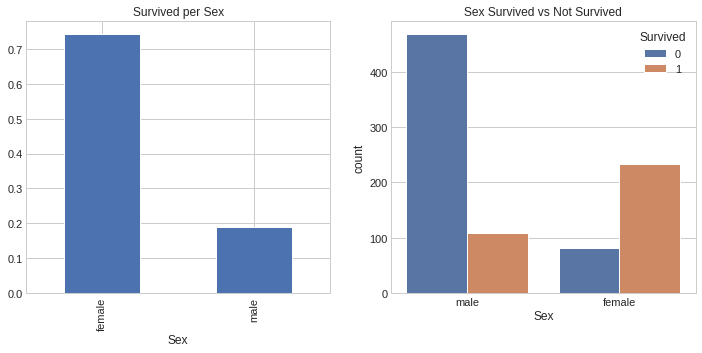

In [221]:
bag('Sex','Survived', 'Survived per Sex', 'Sex Survived vs Not Survived')

배에 탑승한 남자 > 탑승한 여자.  
생존 여성의 수 = 생존 남성의 수 X 2.(선박 여성의 생존율은 75%인 반면, 남성의 생존율은 18-19%)  
남성/여성을 1,2로 나누면 될 것 같지만, 조금 더 세분화 하면 좋을 것으로 보임  
(예- 아기들은 아기인지, 남자인지, 여자인지, 구명보트를 태울 때 안 물어본 것이기 때문)  
생존 Pclass별 성별 확인

In [222]:
pd.crosstab([train.Sex, train.Survived], train.Pclass, margins = True).style.background_gradient(cmap='summer_r')

'Sex'항목을 다음과 같이 나누는 것도 좋은 생각

In [223]:
# temp['Gender'] = 0
# temp.loc[ (temp['Sex']=='male') & (temp['Pclass']==1),'Gender' ] = 1
# temp.loc[ (temp['Sex']=='male') & (temp['Pclass']==2),'Gender' ] = 2
# temp.loc[ (temp['Sex']=='male') & (temp['Pclass']==3),'Gender' ] = 2
# temp.loc[ (temp['Sex']=='female') & (temp['Pclass']==1),'Gender' ] = 3
# temp.loc[ (temp['Sex']=='female') & (temp['Pclass']==2),'Gender' ] = 4
# temp.loc[ (temp['Sex']=='female') & (temp['Pclass']==3),'Gender' ] = 5
# temp.loc[temp['Age']<1.0, 'Gender'] = 6

## Age분석
- age는 continuous 값
- 빈칸이 많으므로 처리가 결정적인 요소
- age의 최대, 최소, 중간 값은?

In [224]:
print('Oldest Passenger was', data['Age'].max(), 'Years')
print('Youngest Passenger was', data['Age'].min(), 'Years')
print('Average Age on the ship was', int(data['Age'].mean()), 'Years')

Oldest Passenger was 80.0 Years
Youngest Passenger was 0.17 Years
Average Age on the ship was 29 Years


- math 모듈
  - ceil(): 올림
  - floor(): 내림
  - max(): 주어진 숫자 중 가장 큰 값
  - min(): 주어진 숫자 중 가장 작은 값
  - mean(): 평균값 (위의 4개와 사용법 다름)

In [225]:
import math
print(math.ceil(0.5))
print(math.floor(0.5))

print(max([1,2,3]))
print(max('Chevrolet'))

print(min([1,2,3]))
print(min('Chevrolet'))

from statistics import mean
a = [5,2,3,2]
avg = mean(a)
print(avg)


1
0
3
v
1
C
3


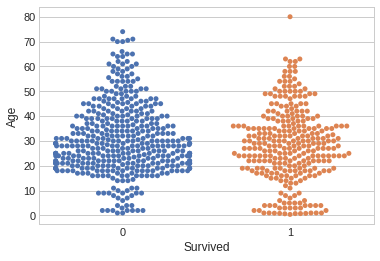

In [226]:
sns.swarmplot(x=train['Survived'], y=train['Age'])
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

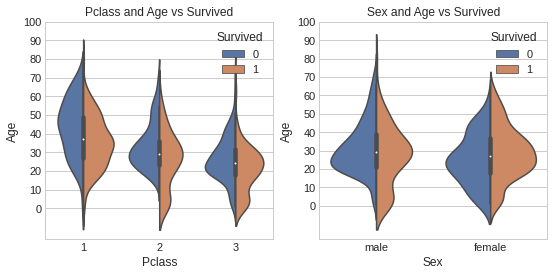

In [227]:
f, ax = plt.subplots(1,2, figsize=(9,4))
sns.violinplot("Pclass", 'Age', hue = 'Survived', data=train, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age', hue='Survived', data=train, split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110, 10))
plt.show()

### 관찰
- Pclass에 따라 어린이 수가 증가 (10세 미만의 어린이의 생존율은 Pclass에 상관없이 높은 것으로 보임)
- Pclass 1에서 20-50세의 Passenger의 생존 가능성은 높으며, 이는 여성에게 더 높은 수치를 보임
- 남성의 경우 나이가 증가함에 따라 생존 확률은  감소

- age null 값 해결
  - 앞서 봤 듯, age에는 117개의 null 값 존재
  - 이러한 NaN 값은 데이터 집합의 평균 수명을 지정하여 대체 가능
  - 그러나 문제는, 평균연랑 29살을 4살 아이에게 할당할 수는 없다는 것.
  - __이름에서 힌트를 얻자__: Initial 별 평균 연령을 보고, Age에 적용


In [228]:
temp.groupby(['Initial']).agg({'Age': ['mean','count']})

Age      
               mean count
Initial                  
Capt      70.000000     1
Col       54.000000     4
Countess  33.000000     1
Don       40.000000     1
Dona      39.000000     1
Dr        43.571429     7
Jonkheer  38.000000     1
Lady      48.000000     1
Major     48.500000     2
Master     5.482642    53
Miss      21.774238   210
Mlle      24.000000     2
Mme       24.000000     1
Mr        32.252151   581
Mrs       36.994118   170
Ms        28.000000     1
Rev       41.250000     8
Sir       49.000000     1

In [229]:
# 이니셜별 평균 연령을 null 값에 할당
temp = temp.reset_index(drop=True)
temp['Age'] = temp.groupby('Initial')['Age'].apply(lambda x : x.fillna(x.mean()))
temp[31:50]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,36.994118,1,0,PC 17569,146.5208,B78,C,Mrs,Spencer,30
32,33,1.0,3,"Glynn, Miss. Mary Agatha",female,21.774238,0,0,335677,7.7500,NaN,Q,Miss,Glynn,31
33,34,0.0,2,"Wheadon, Mr. Edward H",male,66.000000,0,0,C.A. 24579,10.5000,NaN,S,Mr,Wheadon,32
34,35,0.0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,NaN,C,Mr,Meyer,33
35,36,0.0,1,"Holverson, Mr. Alexander Oskar",male,42.000000,1,0,113789,52.0000,NaN,S,Mr,Holverson,34
36,37,1.0,3,"Mamee, Mr. Hanna",male,32.252151,0,0,2677,7.2292,NaN,C,Mr,Mamee,35
37,38,0.0,3,"Cann, Mr. Ernest Charles",male,21.000000,0,0,A./5. 2152,8.0500,NaN,S,Mr,Cann,36
38,39,0.0,3,"Vander Planke, Miss. Augusta Maria",female,18.000000,2,0,345764,18.0000,NaN,S,Miss,Vander,18
39,40,1.0,3,"Nicola-Yarred, Miss. Jamila",female,14.000000,1,0,2651,11.2417,NaN,C,Miss,Nicola,37
40,41,0.0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.000000,1,0,7546,9.4750,NaN,S,Mrs,Ahlin,38


- lambda 함수의 기본

파이썬의 lambda 함수는 런타임에 생성해서 사용할 수 있는 익명 함수  
일반적인 함수처럼 정의해두고 쓰는 것이 아닌, 필요한 곳에서 간단한 기능을 즉시 수행 하고 버릴 수 있는 함수

In [230]:
# 단순 계산
a = 2 
b = 2 
print(a**b)

4


In [231]:
# 이를 함수화
def sample(a,b):
  print(a**b)
sample(2,2)

4


In [232]:
# 이를 람다
a = lambda x, y: x**y
print(a(2,2))

4


반복되는 단순한 계산 등에서는 람다가 유용

In [233]:
# 다른 샘플로 
sample1 = lambda x,y,z : x+y+z
print(sample1(1,2,3))

def sample1(x,y,z):
  n = x+y+z
  print(n)

sample1(1,2,3)

sample2 = lambda x,y,z : x*y*z
print(sample2(1,2,3))

z = (lambda x,y : x+y)(10,20)
print(z)

6
6
6
30


In [234]:
# 다른 예
y = lambda x: x**3
print(y(7))

z = (lambda x,y : x**3 + y**3) (3,4)
print(z)

z = (lambda x,y : x**3 + y**3)
print(z(3,4))

343
91
91


In [235]:
# 짝수 홀수를 가려내는 것을 for loop = continue로 람다로 비교
for num in range(1,3):
  if num % 2 == 0:
    print(num)
    continue
for num in range(1,3):
  if num % 2 == 1:
    print(num)
    continue


print((lambda x,y : x if x % 2 == 0 else y)(1,2))
print((lambda x,y : x if x % 2 == 1 else y)(1,2))

mylist = list(range(1,5))
print(list(filter(lambda n : n % 2 == 0, mylist)))
print(list(filter(lambda n : n % 2 == 1, mylist)))

2
1
2
1
[2, 4]
[1, 3]


In [236]:
# 람다와 map 함수
print(list(map(lambda x : x**2, [5,6,7,8,9])))

[25, 36, 49, 64, 81]


In [237]:
# 람다와 filter 함수
mylist = [1,2,3]
print(list(filter( lambda x: x>2, mylist)))

[3]


- Initial 정리

In [238]:
temp.Initial.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Ms            2
Mlle          2
Don           1
Countess      1
Sir           1
Capt          1
Jonkheer      1
Lady          1
Mme           1
Dona          1
Name: Initial, dtype: int64

In [239]:
temp['Initial'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dona' , 'Dr', 'Jonkheer', 'Lady', 'Major', 'Master',  'Miss'  ,'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'], ['Sacrificed', 'Respected', 'Nobles', 'Mr', 'Mrs', 'Respected', 'Mr', 'Nobles', 'Respected', 'Kids', 'Miss', 'Nobles', 'Nobles', 'Mr', 'Mrs', 'Nobles', 'Sacrificed', 'Nobles'],inplace=True)
temp['Initial'].replace(['Kids', 'Miss', 'Mr', 'Mrs', 'Nobles', 'Respected', 'Sacrificed'], [4, 4, 2, 5, 6, 3, 1], inplace=True)

In [240]:
temp['Age_Range'] = pd.qcut(temp['Age'],10)

In [241]:
survpct('Age_Range')

Age_Range
(0.169, 16.0]     0.548077
(16.0, 21.0]      0.307692
(21.0, 23.0]      0.487179
(23.0, 26.0]      0.369863
(26.0, 30.0]      0.400000
(30.0, 32.252]    0.198718
(32.252, 33.0]    0.411765
(33.0, 39.0]      0.504762
(39.0, 48.0]      0.357143
(48.0, 80.0]      0.387500
Name: Survived, dtype: float64

In [242]:
temp['Agroup'] = 0

temp.loc[temp['Age'] < 1.0, 'Agroup'] = 1
temp.loc[(temp['Age'] >=1.0) & (temp['Age'] <= 3.0), 'Agroup'] = 2
temp.loc[(temp['Age'] > 3.0) & (temp['Age'] < 11.0), 'Agroup'] = 7
temp.loc[(temp['Age'] >= 11.0) & (temp['Age'] < 15.0), 'Agroup'] = 13
temp.loc[(temp['Age'] >= 15.0) & (temp['Age'] < 18.0), 'Agroup'] = 16
temp.loc[(temp['Age'] >= 18.0) & (temp['Age'] <=  20.0), 'Agroup'] = 18
temp.loc[(temp['Age'] > 20.0) & (temp['Age'] <= 22.0), 'Agroup'] = 21
temp.loc[(temp['Age'] > 22.0) & (temp['Age'] <= 26.0), 'Agroup'] = 24
temp.loc[(temp['Age'] > 26.0) & (temp['Age'] <= 30.0), 'Agroup'] = 28
temp.loc[(temp['Age'] > 30.0) & (temp['Age'] <= 32.0), 'Agroup'] = 31
temp.loc[(temp['Age'] > 32.0) & (temp['Age'] <= 34.0), 'Agroup'] = 33
temp.loc[(temp['Age'] > 34.0) & (temp['Age'] <= 38.0), 'Agroup'] = 36
temp.loc[(temp['Age'] > 38.0) & (temp['Age'] <= 52.0), 'Agroup'] = 45
temp.loc[(temp['Age'] > 52.0) & (temp['Age'] <= 75.0), 'Agroup'] = 60
temp.loc[temp['Age'] > 75.0, 'Agroup'] = 78

In [243]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36


- Age는 그룹화 시키면 좋으나, 학습을 위해 그냥 두기로 하고, 그룹화는 'Fare'로 진행
- 위를 보고 sex를 남,녀, 1세 이하 Baby로 분류

In [244]:
temp.loc[(temp['Sex'] == 'male'),'Sex'] = 1
temp.loc[(temp['Sex'] == 'female'),'Sex'] = 2
temp.loc[(temp['Age']<1), 'Sex'] = 3

In [245]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

## Sibsp, Parch 분석
- 위 두 가지를 가지고 family 분석
- Sibsp: 탑승자가 혼자인지 또는 가족과 함께 있는지
- Parch: 부모와 함께 탔는지 아닌지
- 이를 Alone 그룹과, Family 그룹으로 분류

In [246]:
temp.loc[ (temp['SibSp']==0) & (temp['Parch']==0), 'Alone'] = 1

In [247]:
temp['Family'] = temp['Parch'] + temp['SibSp'] + 1

In [248]:
temp.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2


In [249]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

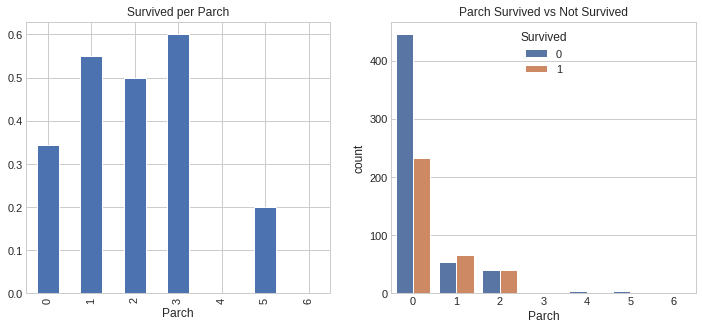

In [250]:
bag('Parch', 'Survived', 'Survived per Parch', 'Parch Survived vs Not Survived')

In [251]:
pd.crosstab([temp['Family'], temp['Survived']], temp['Pclass'], margins=True,).style.background_gradient(cmap='summer_r')

- Pclass3에 식구가 많은 탑승객들이 대부분 존재
- 부모와 함께 탑승한 승객은 생존 가능성이 높지만, 숫자가 올라갈수록 줄어 듬
- 생존가능성은 배에 1-3명의 부모가 있는 탑승객에게 좋음
- 혼자 탑승한 승객 또한 생존 가능성이 낮음
- 가족이 4명 이상일 경우 생존가능성 줄어 듦
- 이는, 소수의 가족들이 있는 귀족층이 생존하고, 혼자가 많은 젊은 이들은 양보할 수 밖에 없고,  
가족이 많은 사람들(특히 3등급 칸)은 전원이 타지 못하면 어느 누구도 타지 못하는 비극적인 상황 보여줌

### 참조
- 아래와 같은 방법으로 Family 중 생존 탑승객 찾을 수 있음  


```
    # 랜덤으로 사는 사람을 생성
    default_survival_chance = 0.5
    data['Family_Survival'] = default_survival_chance

    # 성이 같은 사람과 요금이 같은 사람을 찾아서 가족을 찾습니다
    # 가족 중 한 사람이 살았다면 다른 사람도 살았을 확률이 크니까요
    for grp, grp_df in data[['Survived','LastName', 'NumName', 'Fare', 'Ticket', 'PassengerId',
                              'SibSp', 'Parch', 'Age', 'Cabin']].groupby(['LastName', 'Fare']):
        
        # 1이 아니면(혼자가 아니면) 가족 
        # 가족이 살았는지 확인
        if (len(grp_df) != 1):
            for ind, row in grp_df.iterrows():
                smax = grp_df.drop(ind)['Survived'].max()
                smin = grp_df.drop(ind)['Survived'].min()
                passID = row['PassengerId']
                if (smax == 1.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                elif (smin == 0.0):
                    data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

    # 결과보기
    print("Number of passengers with family survival information:", 
          data.loc[data['Family_Survival']!=0.5].shape[0])



      # 1이 아니면(혼자가 아니면) 가족이 발견된 것이고
      # 그룹멤버가 살았는지 봅니다
      for _, grp_df in data.groupby('Ticket'):
          if (len(grp_df) != 1):
              for ind, row in grp_df.iterrows():
                  if (row['Family_Survival'] == 0) | (row['Family_Survival']== 0.5):
                      smax = grp_df.drop(ind)['Survived'].max()
                      smin = grp_df.drop(ind)['Survived'].min()
                      passID = row['PassengerId']
                      if (smax == 1.0):
                          data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 1
                      elif (smin==0.0):
                          data.loc[data['PassengerId'] == passID, 'Family_Survival'] = 0

      # 결과 
      print("Number of passenger with family/group survival information: " 
            +str(data[data['Family_Survival']!=0.5].shape[0]))

      # 위의 결과에서 오류가 나오면 다시 수정해 보세요

```

## Ticket 분석

In [252]:
temp['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

통일성이 없는 배열.  
빈칸이 존재하는지 확인 필요

In [253]:
temp.Ticket.isnull().any()

False

- 티켓에서 영문있는 것과 숫자만 있는 것을 추출

In [254]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z0-9]+)')
temp = temp.reset_index(drop=True)
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,113803
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,373450


In [255]:
temp['Initick'] = temp.Ticket.str.extract('^([A-Za-z]+)')

In [256]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN


In [257]:
temp['NumTicket'] = temp['Initick'].factorize()[0]

In [258]:
temp.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.000000,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.000000,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1
4,5,0.0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1
5,6,0.0,3,"Moran, Mr. James",1,32.252151,0,0,330877,8.4583,NaN,Q,2,Moran,5,"(30.0, 32.252]",33,1.0,1,NaN,-1
6,7,0.0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S,2,McCarthy,6,"(48.0, 80.0]",60,1.0,1,NaN,-1
7,8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,NaN,S,4,Palsson,7,"(0.169, 16.0]",2,NaN,5,NaN,-1
8,9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,27.000000,0,2,347742,11.1333,NaN,S,5,Johnson,8,"(26.0, 30.0]",28,NaN,3,NaN,-1
9,10,1.0,2,"Nasser, Mrs. Nicholas (Adele Achem)",2,14.000000,1,0,237736,30.0708,NaN,C,5,Nasser,9,"(0.169, 16.0]",13,NaN,2,NaN,-1


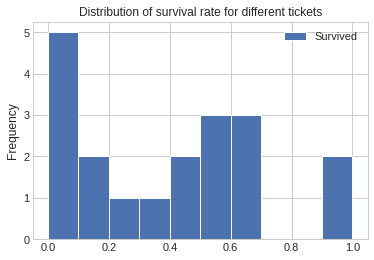

In [259]:
temp.groupby('NumTicket')['Survived'].mean().to_frame().plot(kind='hist')
plt.title('Distribution of survival rate for different tickets')
plt.show()

## Fare 분석

In [260]:
print('Highest Fare was:', temp['Fare'].max())
print('Lowest Fare was:', temp['Fare'].min())
print('Average Fare was:', temp['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 33.2954792813456


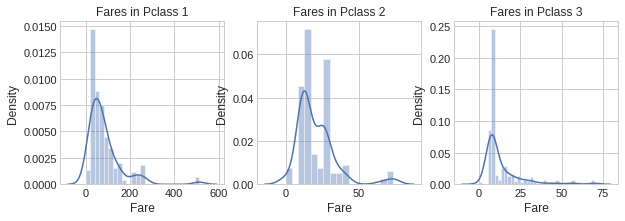

In [261]:
f, ax = plt.subplots(1,3, figsize=(10,3))
sns.distplot(train[ train['Pclass'] == 1 ].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[ train['Pclass'] == 2 ].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[ train['Pclass'] == 3 ].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

- Pclass 1의 승객 요금에는 큰 분포가 있는 것으로 보
- Fare로 그룹을 나눔
- qcut을 활용하여 데이터 나눔
- cut와 qcut의 차이

In [262]:
def groupmean(a,b):
  return temp.groupby([a])[b].mean().to_frame().style.background_gradient(cmap='summer_r')

temp['Fare_Range'] = pd.qcut(train['Fare'],10)
groupmean('Fare_Range','Fare')

,Fare
Fare_Range,
"(-0.001, 7.55]",5.928717
"(7.55, 7.854]",7.768490
"(7.854, 8.05]",7.963669
"(8.05, 10.5]",9.521367
"(10.5, 14.454]",12.940231
"(14.454, 21.679]",17.386408
"(21.679, 27.0]",25.487501
"(27.0, 39.688]",32.282186
"(39.688, 77.958]",59.444572


- Fare를 그룹화하여 Fgroup라고 이름 지음

0 and below -> 0

7.125 and below-> 5.0

7.9 and below-> 7.5

8.03 or less-> 8.0

Less than 10.5-> 9.5

Less than 23-> 16.0

27.8 and below-> 25.5

51 and below-> 38

73.5 and below-> 62

Over 73.5-> 100

In [263]:
temp['Fgroup'] = 0

temp.loc[temp['Fare'] <= 0,'Fgroup'] = 0
temp.loc[(temp['Fare'] > 0) & (temp['Fare'] <= 7.125), 'Fgroup'] = 1
temp.loc[(temp['Fare'] > 7.125) & (temp['Fare'] <= 7.9), 'Fgroup'] = 2
temp.loc[(temp['Fare'] > 7.9) & (temp['Fare'] <= 8.03), 'Fgroup'] = 3
temp.loc[(temp['Fare'] > 8.03) & (temp['Fare'] < 10.5), 'Fgroup'] = 4
temp.loc[(temp['Fare'] >= 10.5) & (temp['Fare'] < 23.0), 'Fgroup'] = 5
temp.loc[(temp['Fare'] >= 23.0) & (temp['Fare'] <= 27.8), 'Fgroup'] = 6
temp.loc[(temp['Fare'] > 27.8) & (temp['Fare'] <= 51.0), 'Fgroup'] = 7
temp.loc[(temp['Fare'] > 51.0) & (temp['Fare'] <= 73.5), 'Fgroup'] = 8
temp.loc[temp['Fare'] > 73.5, 'Fgroup'] = 9

temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4


## Cabin 분석
- Cabin의 위치에 따라 달라지는 것이 있는지?

In [264]:
temp.Cabin.value_counts().head(10)

C23 C25 C27        6
B57 B59 B63 B66    5
G6                 5
C78                4
C22 C26            4
F4                 4
B96 B98            4
F33                4
F2                 4
D                  4
Name: Cabin, dtype: int64

In [265]:
temp.Cabin.isnull().sum()

1014

- null 값 많이 존재
- Cabin에 빈 값이 많아 이를 다른 분류로 잡고, 기존 것은 이니셜로 분류
- 빈 값 중, Pclass와 관련지어 1등급은 X, 2등급은 Y, 3등급은 Z로 분류

In [266]:
temp['Inicab'] = 0 
temp['Inicab'] = temp['Cabin'].str.extract('^([A-Za-z]+)')
temp.loc[ (temp['Cabin'].isnull()) & (temp['Pclass']==1), 'Inicab' ] = 'X'
temp.loc[ (temp['Cabin'].isnull()) & (temp['Pclass']==2), 'Inicab' ] = 'Y'
temp.loc[ (temp['Cabin'].isnull()) & (temp['Pclass']==3), 'Inicab' ] = 'Z'
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,Braund,0,"(21.0, 23.0]",21,NaN,2,A,0,"(-0.001, 7.55]",2,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",2,38.0,1,0,PC 17599,71.2833,C85,C,5,Cumings,1,"(33.0, 39.0]",36,NaN,2,PC,1,"(39.688, 77.958]",8,C
2,3,1.0,3,"Heikkinen, Miss. Laina",2,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,4,Heikkinen,2,"(23.0, 26.0]",24,1.0,1,STON,2,"(7.854, 8.05]",3,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",2,35.0,1,0,113803,53.1000,C123,S,5,Futrelle,3,"(33.0, 39.0]",36,NaN,2,NaN,-1,"(39.688, 77.958]",8,C
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,2,Allen,4,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(7.854, 8.05]",4,Z


In [267]:
temp['Inicab'] = temp['Inicab'].factorize()[0]
temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,S,4,Bonnell,11,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,S,2,Saundercock,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,S,2,Andersson,13,"(33.0, 39.0]",45,NaN,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,S,4,Vestrom,14,"(0.169, 16.0]",13,1.0,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,S,5,Hewlett,15,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,Q,4,Rice,16,"(0.169, 16.0]",2,NaN,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,S,2,Williams,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,S,5,Vander,18,"(30.0, 32.252]",31,NaN,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,36.994118,0,0,2649,7.2250,NaN,C,5,Masselmani,19,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(-0.001, 7.55]",2,0


## Embarked 분석

In [268]:
pd.crosstab([temp.Embarked, temp.Pclass], [temp.Sex, temp.Survived],margins=True).style.background_gradient(cmap='summer_r')

- 승선 장소 별 생존 확률

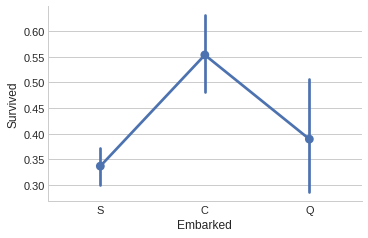

In [269]:
sns.factorplot('Embarked', 'Survived', data=temp)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

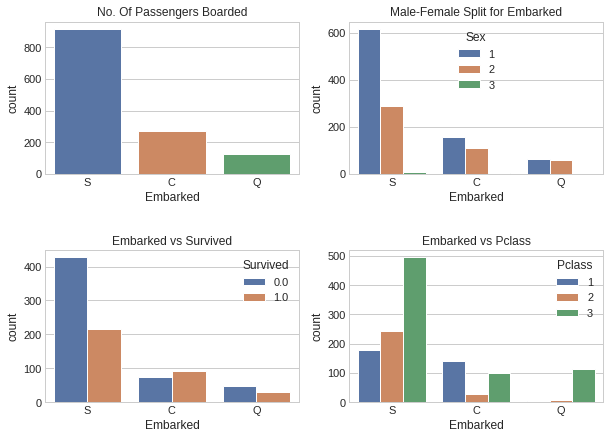

In [270]:
f, ax = plt.subplots(2,2, figsize=(10,7))
sns.countplot('Embarked', data=temp, ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=temp, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=temp, ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=temp, ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

- 포트 C의 생존가능성은 0.55, 포트 S가 가장 낮음. S에서 최대 탑승. 대다수는 Pclass 3
- C의 승객이 많은 비율로 살아 남음. 아마 Pclass 1과 Pclass 2 승객이 많아서 일 것
- S는 대부분의 부자들이 탑승한 항구이지만, 생존 가능성은 낮음. Pclass 3의 승객도 많음
- Q는 승객의 약 95%가 Pclass 3

- null값 확인

In [271]:
temp.loc[ temp.Embarked.isnull(),]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,B28,NaN,4,Icard,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,B28,NaN,5,Stone,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


- 티켓번호가 '113572'로 동일
- 동일한 티켓번호가 존재하는지 확인

In [272]:
temp.loc[temp.Ticket == '113572',]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
61,62,1.0,1,"Icard, Miss. Amelie",2,38.0,0,0,113572,80.0,B28,NaN,4,Icard,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.0,0,0,113572,80.0,B28,NaN,5,Stone,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8


- 존재하지 않음
- 가장 비슷한 번호를 확인

In [273]:
temp.sort_values(['Ticket'], ascending=True)[55:70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
54,55,0.0,1,"Ostby, Mr. Engelhart Cornelius",1,65.000000,0,1,113509,61.9792,B30,C,2,Ostby,51,"(48.0, 80.0]",60,NaN,2,NaN,-1,"(39.688, 77.958]",8,8
351,352,0.0,1,"Williams-Lambert, Mr. Fletcher Fellows",1,32.252151,0,0,113510,35.0000,C128,S,2,Williams,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(27.0, 39.688]",7,1
252,253,0.0,1,"Stead, Mr. William Thomas",1,62.000000,0,0,113514,26.5500,C87,S,2,Stead,217,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",2,62.000000,0,0,113572,80.0000,B28,NaN,5,Stone,616,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
61,62,1.0,1,"Icard, Miss. Amelie",2,38.000000,0,0,113572,80.0000,B28,NaN,4,Icard,58,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(77.958, 512.329]",9,8
802,803,1.0,1,"Carter, Master. William Thornton II",1,11.000000,1,2,113760,120.0000,B96 B98,S,4,Carter,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
390,391,1.0,1,"Carter, Mr. William Ernest",1,36.000000,1,2,113760,120.0000,B96 B98,S,2,Carter,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
435,436,1.0,1,"Carter, Miss. Lucile Polk",2,14.000000,1,2,113760,120.0000,B96 B98,S,4,Carter,215,"(0.169, 16.0]",13,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
763,764,1.0,1,"Carter, Mrs. William Ernest (Lucile Polk)",2,36.000000,1,2,113760,120.0000,B96 B98,S,5,Carter,215,"(33.0, 39.0]",36,NaN,4,NaN,-1,"(77.958, 512.329]",9,8
185,186,0.0,1,"Rood, Mr. Hugh Roscoe",1,32.252151,0,0,113767,50.0000,A32,S,2,Rood,162,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(39.688, 77.958]",7,6


- 앞 뒤로 모두 Embarked 가 S이므로 해당 값도 S일 가능성이 높음

In [274]:
temp.loc[ temp.Embarked.isnull(), 'Embarked'] = 'S'

In [275]:
temp.loc[(temp.Embarked.isnull())]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab


In [276]:
temp['Embarked'] = temp['Embarked'].factorize()[0]
    
temp[11:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,LastName,NumName,Age_Range,Agroup,Alone,Family,Initick,NumTicket,Fare_Range,Fgroup,Inicab
11,12,1.0,1,"Bonnell, Miss. Elizabeth",2,58.000000,0,0,113783,26.5500,C103,0,4,Bonnell,11,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(21.679, 27.0]",6,1
12,13,0.0,3,"Saundercock, Mr. William Henry",1,20.000000,0,0,A/5. 2151,8.0500,NaN,0,2,Saundercock,12,"(16.0, 21.0]",18,1.0,1,A,0,"(7.854, 8.05]",4,0
13,14,0.0,3,"Andersson, Mr. Anders Johan",1,39.000000,1,5,347082,31.2750,NaN,0,2,Andersson,13,"(33.0, 39.0]",45,NaN,7,NaN,-1,"(27.0, 39.688]",7,0
14,15,0.0,3,"Vestrom, Miss. Hulda Amanda Adolfina",2,14.000000,0,0,350406,7.8542,NaN,0,4,Vestrom,14,"(0.169, 16.0]",13,1.0,1,NaN,-1,"(7.55, 7.854]",2,0
15,16,1.0,2,"Hewlett, Mrs. (Mary D Kingcome)",2,55.000000,0,0,248706,16.0000,NaN,0,5,Hewlett,15,"(48.0, 80.0]",60,1.0,1,NaN,-1,"(14.454, 21.679]",5,3
16,17,0.0,3,"Rice, Master. Eugene",1,2.000000,4,1,382652,29.1250,NaN,2,4,Rice,16,"(0.169, 16.0]",2,NaN,6,NaN,-1,"(27.0, 39.688]",7,0
17,18,1.0,2,"Williams, Mr. Charles Eugene",1,32.252151,0,0,244373,13.0000,NaN,0,2,Williams,17,"(30.0, 32.252]",33,1.0,1,NaN,-1,"(10.5, 14.454]",5,3
18,19,0.0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",2,31.000000,1,0,345763,18.0000,NaN,0,5,Vander,18,"(30.0, 32.252]",31,NaN,2,NaN,-1,"(14.454, 21.679]",5,0
19,20,1.0,3,"Masselmani, Mrs. Fatima",2,36.994118,0,0,2649,7.2250,NaN,1,5,Masselmani,19,"(33.0, 39.0]",36,1.0,1,NaN,-1,"(-0.001, 7.55]",2,0


# 5.Feature Engineering
- 문자를 숫자로 바꾸는 것도 Feature Engineering의 일부이지만, 위에서 이미 진행했음

## 항목 추가하기
- 추가항목 생성
 - Priority: (1)Nobles (2)Women in Pclass 1,2 (3)Babies under 1 (4)Kids under 17 in Pclass 1,2 (5)High Fare/Women in Pclass 3
 - FH: Female Higher Survival Group
 - MH: Male Higher Survival Group
 - FL: Female Lower Survival Group
 - ML: Male Lower Survival Group

- Priority - (1) Nobles (2) Women in Pclass 1 (3) Babies under 1 (4) Kids under 17 in Pclass 1 & 2 (5) Women in Pclass 2 (6) Higher Fare

In [277]:
survpct('Initial')

Initial
1    0.000000
2    0.156069
3    0.454545
4    0.675676
5    0.792000
6    1.000000
Name: Survived, dtype: float64

In [278]:
survpct('Pclass')

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [279]:
survpct('Sex')

Sex
1    0.181818
2    0.740385
3    1.000000
Name: Survived, dtype: float64

In [280]:
survpct('Age').head()

Age
0.17    NaN
0.33    NaN
0.42    1.0
0.67    1.0
0.75    1.0
Name: Survived, dtype: float64

In [281]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [282]:
temp['Priority'] = 0
temp.loc[ (temp['Initial'] == 6), 'Priority' ] = 1
temp.loc[ (temp['Pclass'] == 1) & (temp['Sex'] == 2), 'Priority' ] = 2
temp.loc[ (temp['Age'] < 1), 'Priority' ] = 3
temp.loc[(temp['Age'] <= 17) & (temp['Pclass'] == 1), 'Priority'] = 4
temp.loc[(temp['Age'] <= 17) & (temp['Pclass'] == 2), 'Priority'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Pclass'] == 2), 'Priority'] = 6
temp.loc[(temp['Fgroup'] == 9), 'Priority'] = 7

In [283]:
survpct('Priority')

Priority
0    0.229508
1    1.000000
2    0.965517
3    1.000000
4    1.000000
5    0.818182
6    0.921053
7    0.762887
Name: Survived, dtype: float64

In [284]:
temp.Priority.value_counts()

0    978
7    145
6    105
2     52
5     16
3      7
4      4
1      2
Name: Priority, dtype: int64

- FH: Female Higher Survival Group

In [285]:
survpct('Family')

Family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [286]:
survpct('Fgroup')

Fgroup
0    0.066667
1    0.037037
2    0.232044
3    0.473684
4    0.144330
5    0.425000
6    0.489362
7    0.353535
8    0.564516
9    0.762887
Name: Survived, dtype: float64

In [287]:
temp['FH'] = 0
temp.loc[ (temp['Sex'] == 1), 'FH' ] = 0
temp.loc[ (temp['Sex'] == 2), 'FH' ] = 1
temp.loc[ (temp['Sex'] == 2) & (temp['Family' ]== 2), 'FH' ] = 2
temp.loc[ (temp['Sex'] == 2) & (temp['Family' ]== 3), 'FH' ] = 3
temp.loc[ (temp['Sex'] == 2) & (temp['Family' ]== 4), 'FH' ] = 4
temp.loc[ (temp['Sex'] == 2) & (temp['Family' ]== 1) & (temp['Pclass'] == 1), 'FH' ] = 5
temp.loc[ (temp['Sex'] == 2) & (temp['Family' ]== 1) & (temp['Pclass'] == 2), 'FH' ] = 6
temp.loc[ (temp['Sex'] == 2) & (temp['Fgroup'] == 3), 'FH' ] = 7
temp.loc[ (temp['Sex'] == 2) & (temp['Fgroup'] >= 5), 'FH' ] = 8

In [288]:
survpct('FH')

FH
0    0.191710
1    0.615385
2    0.333333
3    0.000000
7    0.666667
8    0.784553
Name: Survived, dtype: float64

In [289]:
temp.FH.value_counts()

0    847
8    354
1     89
7      8
2      7
3      4
Name: FH, dtype: int64

- MH: Male Higher Survival Group

In [290]:
temp['MH'] = 0
temp.loc[ (temp['Sex'] == 2), 'MH' ] = 0
temp.loc[ (temp['Sex'] == 1), 'MH' ] = 1
temp.loc[ (temp['Sex'] == 1) & (temp['Family'] == 2), 'MH' ] = 2
temp.loc[ (temp['Sex'] == 1) & (temp['Family'] == 3), 'MH' ] = 3 
temp.loc[ (temp['Sex'] == 1) & (temp['Family'] == 4), 'MH' ] = 4
temp.loc[ (temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 1), 'MH' ] = 5 
temp.loc[ (temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 2), 'MH' ] = 6 
temp.loc[ (temp['Sex'] == 1) & (temp['Fgroup'] == 3), 'MH' ] = 7
temp.loc[ (temp['Sex'] == 1) & (temp['Fgroup'] >= 5), 'MH' ] = 8

In [291]:
survpct('MH')

MH
0    0.746082
1    0.094017
2    0.111111
3    0.000000
5    0.000000
6    0.000000
7    0.384615
8    0.253333
Name: Survived, dtype: float64

In [292]:
temp.MH.value_counts()

0    474
8    450
1    335
7     16
2     13
5      8
6      7
3      6
Name: MH, dtype: int64

- FL: Female Lower Survival Group

In [293]:
temp['FL'] = 0
temp.loc[(temp['Sex'] == 1), 'FL'] = 0
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] < 5), 'FL'] = 1
temp.loc[(temp['Sex'] == 2) & (temp['Fgroup'] != 3), 'FL'] = 2
temp.loc[(temp['Sex'] == 2) & (temp['FH'] == 1), 'FL'] = 3
temp.loc[(temp['Sex'] == 2) & (temp['Family'] < 2), 'FL'] = 4
temp.loc[(temp['Sex'] == 2) & (temp['Family'] > 4), 'FL'] = 5
temp.loc[(temp['Sex'] == 2) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'FL'] = 6

In [294]:
survpct('FL')

FL
0    0.191710
1    0.000000
2    0.809211
4    0.939394
5    0.272727
6    0.616667
Name: Survived, dtype: float64

In [295]:
temp.FL.value_counts()

0    847
2    225
6    100
4     94
5     41
1      2
Name: FL, dtype: int64

- ML: Male Lower Survival Group

In [296]:
temp['ML'] = 0
temp.loc[(temp['Sex'] == 2), 'ML'] = 0
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] < 5), 'ML'] = 1
temp.loc[(temp['Sex'] == 1) & (temp['Fgroup'] != 3), 'ML'] = 2
temp.loc[(temp['Sex'] == 1) & (temp['MH'] <7), 'ML'] = 3
temp.loc[(temp['Sex'] == 1) & (temp['Family'] < 2), 'ML'] = 4
temp.loc[(temp['Sex'] == 1) & (temp['Family'] > 4), 'ML'] = 5
temp.loc[(temp['Sex'] == 1) & (temp['Family'] == 1) & (temp['Pclass'] == 3), 'ML'] = 6

In [297]:
survpct('ML')

ML
0    0.746082
1    0.333333
2    0.318966
3    0.076923
4    0.217687
5    0.034483
6    0.121212
Name: Survived, dtype: float64

In [298]:
temp.ML.value_counts()

0    474
6    372
4    224
2    176
5     41
3     19
1      3
Name: ML, dtype: int64

# 6.마지막 항목 결정

In [299]:
temp['F1'] = temp['Priority']
temp['F2'] = temp['FH']
temp['F3'] = temp['MH']
temp['F4'] = temp['FL']
temp['F5'] = temp['ML']
temp['F6'] = temp['Initial']
temp['F7'] = temp['Fgroup']
temp['F8'] = temp['NumName']
temp['F9'] = temp['NumTicket']
temp['F10'] = temp['Family']
temp['F11'] = temp['Embarked']
temp['F12'] = temp['Sex']
temp['F13'] = temp['Pclass']

- 두 개의 새로운 데이터 프레임 생성 (두 가지 모두 사용해보기 위해)
  - 레이블 인코딩: 각 항목의 값을 서열화(번호 부여)
  - 원핫 인코딩: 열 내에서의 항목을 나누어서 이를 0이냐 1이냐 구분(맞는지 아닌지 두 가지)
  - ex: 나이별 서열화 세워 5번, 6번 부여하는 것이 레이블 인코딩  
  원핫인코딩은 16살 이면 1 아니면 0, 17살이면 1 아니면 0 이런 식이므로 열이 많아짐

In [300]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

- 데이터 프레임 생성

In [301]:
# 라벨 인코딩
dfl = pd.DataFrame()

In [302]:
good_columns = ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8','F9', 'F10', 'F11', 'F12', 'F13']
dfl[good_columns] = temp[good_columns]

In [303]:
dfl.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,2,2,0,0,2,0,1,3
1,2,8,0,2,0,5,8,1,1,2,1,2,1
2,0,7,0,6,0,4,3,2,2,1,0,2,3
3,2,8,0,2,0,5,8,3,-1,2,0,2,1
4,0,0,1,0,6,2,4,4,-1,1,0,1,3


In [304]:
dfh = dfl.copy()

In [305]:
dfl_enc = dfl.apply(LabelEncoder().fit_transform)
dfl_enc.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,2,0,3,1,2,0,1,1,0,0,2
1,2,5,0,2,0,4,8,1,2,1,1,1,0
2,0,4,0,5,0,3,3,2,3,0,0,1,2
3,2,5,0,2,0,4,8,3,0,1,0,1,0
4,0,0,1,0,6,1,4,4,0,0,0,0,2


In [306]:
one_hot_cols = dfh.columns.tolist()
dfh_enc = pd.get_dummies(dfh, columns = one_hot_cols)
dfh_enc.head()

,F1_0,F1_1,F1_2,F1_3,F1_4,F1_5,F1_6,F1_7,F2_0,F2_1,F2_2,F2_3,F2_7,F2_8,F3_0,F3_1,F3_2,F3_3,F3_5,F3_6,F3_7,F3_8,F4_0,F4_1,F4_2,F4_4,F4_5,F4_6,F5_0,F5_1,F5_2,F5_3,F5_4,F5_5,F5_6,F6_1,F6_2,F6_3,F6_4,F6_5,...,F8_852,F9_-1,F9_0,F9_1,F9_2,F9_3,F9_4,F9_5,F9_6,F9_7,F9_8,F9_9,F9_10,F9_11,F9_12,F9_13,F9_14,F9_15,F9_16,F9_17,F9_18,F9_19,F10_1,F10_2,F10_3,F10_4,F10_5,F10_6,F10_7,F10_8,F10_11,F11_0,F11_1,F11_2,F12_1,F12_2,F12_3,F13_1,F13_2,F13_3
0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1


# 7.머신러닝 모델 만들기
- 인코딩 파일을 train과 test로 구분해 놓은 행 쪼개기

In [307]:
train = dfh_enc[:ntrain]
test = dfh_enc[ntrain:]

In [308]:
X_train = train
X_test = test

In [309]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [310]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier()
gbc = GradientBoostingClassifier()
svc = SVC(probability=True)
ext = ExtraTreesClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier()

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logisitic Regression',' XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier' ]
scores = {}

# 연속적으로 모델을 학습하고 교차 검증
for ind, mod in enumerate(models):
  mod.fit(X_train, y_train)
  acc = cross_val_score(mod, X_train, y_train, scoring = 'accuracy', cv = 10)
  scores[model_names[ind]] = acc

In [311]:
results = pd.DataFrame(scores).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean',ascending = False)
result_df.head(11)

,0,1,2,3,4,5,6,7,8,9,mean
Bagging Classifier,0.822222,0.865169,0.775281,0.887640,0.887640,0.831461,0.853933,0.775281,0.853933,0.842697,0.839526
Extra Trees,0.766667,0.865169,0.752809,0.876404,0.887640,0.853933,0.853933,0.786517,0.853933,0.831461,0.832846
XGBoost,0.833333,0.820225,0.775281,0.898876,0.853933,0.831461,0.853933,0.764045,0.853933,0.842697,0.832772
SVC,0.833333,0.887640,0.797753,0.876404,0.865169,0.797753,0.808989,0.764045,0.865169,0.820225,0.831648
Random Forest,0.777778,0.876404,0.752809,0.887640,0.887640,0.842697,0.831461,0.775281,0.853933,0.820225,0.830587
Gradient Boosting,0.811111,0.831461,0.775281,0.876404,0.865169,0.831461,0.842697,0.797753,0.831461,0.842697,0.830549
Logisitic Regression,0.800000,0.853933,0.797753,0.865169,0.876404,0.808989,0.820225,0.786517,0.853933,0.820225,0.828315
AdaBoost,0.822222,0.842697,0.797753,0.865169,0.853933,0.808989,0.808989,0.775281,0.820225,0.842697,0.823795
K Nearest Neighbour,0.788889,0.808989,0.786517,0.797753,0.842697,0.786517,0.786517,0.730337,0.842697,0.831461,0.800237
Gaussian Process,0.522222,0.696629,0.539326,0.494382,0.573034,0.528090,0.426966,0.561798,0.550562,0.606742,0.549975


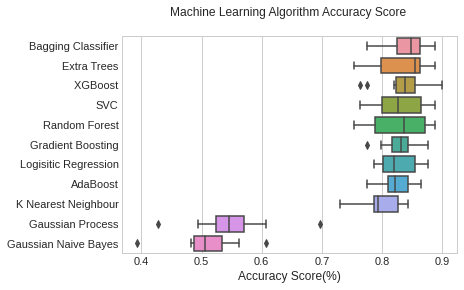

In [312]:
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score(%)')
plt.show()

In [313]:
# 중요도 보는 함수 생성
def importance_plotting(data, xlabel, ylabel, title, n=20):
  sns.set(style='whitegrid')
  ax = data.tail(n).plot(kind='barh')

  ax.set(title=title, xlabel=xlabel, ylabel=ylabel)
  ax.xaxis.grid(False)
  ax.yaxis.grid(True)
  plt.show()

- xgb

In [314]:
# 데이터 프레임에 항목 중요도 추가
fi = {'Features': train.columns.tolist(), 'Importance':xgb.feature_importances_}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

In [315]:
importance

,Features,Importance
F8_420,F8_420,0.000000
F8_560,F8_560,0.000000
F8_561,F8_561,0.000000
F8_562,F8_562,0.000000
F8_563,F8_563,0.000000
...,...,...
F7_2,F7_2,0.034421
F6_2,F6_2,0.062341
F2_0,F2_0,0.128406
F1_0,F1_0,0.169090


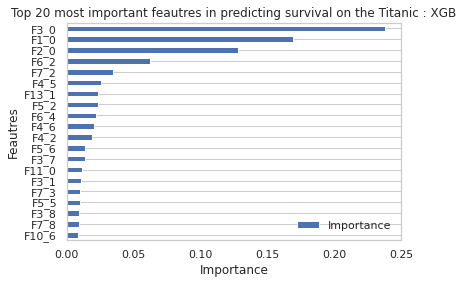

In [316]:
# 그래프 제목
title = 'Top 20 most important feautres in predicting survival on the Titanic : XGB'

# 그래프 그리기
importance_plotting(importance, 'Importance', 'Feautres', title, 20)

- Logistic Regression

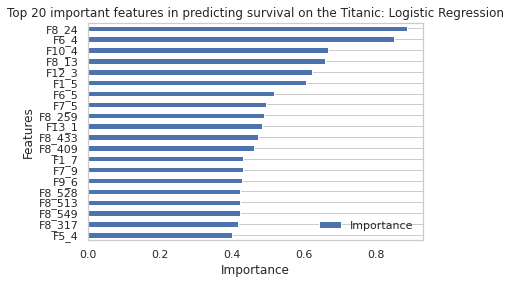

In [317]:
# 데이터 프레임에 중요도 추가(Logistic Regression은 중요도보다 coefficients 사용)
# Features라는 열에 train 열들의 이름을 리스트로 넣고, Importance에는 'Logistic regression에는 coefficient를 바꾸어 넣어라'는 numpy 명령(즉 가로를 세로로)
fi = {'Features':train.columns.tolist(), 'Importance':np.transpose(log.coef_[0])}
importance = pd.DataFrame(fi, index=fi['Features']).sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: Logistic Regression'
# 그래프 그리기
importance_plotting(importance, 'Importance', 'Features', title, 20)

- gbc, xgb, ran, ext, ada

In [318]:
# 5가지 모델에 대한 항목 중요도 얻기
gbc_imp = pd.DataFrame({'Feature':train.columns, 'gbc importance':gbc.feature_importances_})
xgb_imp = pd.DataFrame({'Feature':train.columns, 'xgb importance':xgb.feature_importances_})
ran_imp = pd.DataFrame({'Feature':train.columns, 'ran importance':ran.feature_importances_})
ext_imp = pd.DataFrame({'Feature':train.columns, 'ext importance':ext.feature_importances_})
ada_imp = pd.DataFrame({'Feature':train.columns, 'ada importance':ada.feature_importances_})

# 이를 하나의 데이터프레임으로
importances = gbc_imp.merge(xgb_imp, on='Feature').merge(ran_imp, on='Feature').merge(ext_imp, on='Feature').merge(ada_imp, on='Feature')

# 항목당 평균 중요도
importances['Average'] = importances.mean(axis=1)

# 랭킹 정하기
importances = importances.sort_values(by='Average', ascending=False).reset_index(drop=True)

# 8.중요도에 따라 모델 재설정

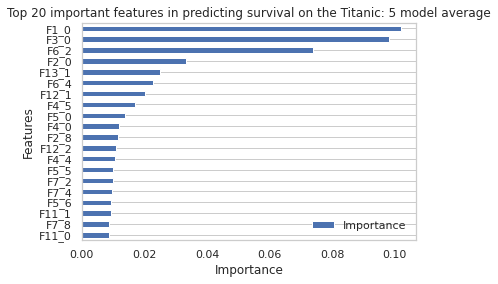

In [319]:
# 중요도를 다시 데이터 프레임에 추가
fi = {'Features':importances['Feature'],'Importance':importances['Average']}
importance = pd.DataFrame(fi).set_index('Features').sort_values('Importance', ascending=True)

# 그래프 타이틀
title = 'Top 20 important features in predicting survival on the Titanic: 5 model average'

# 그래프 보기
importance_plotting(importance, 'Importance', 'Features', title, 20)

In [320]:
importance1 = importance[-381:]
importance1[371:381]

,Importance
Features,
F4_0,0.011986
F5_0,0.013895
F4_5,0.017011
F12_1,0.020199
F6_4,0.022861
F13_1,0.025111
F2_0,0.033409
F6_2,0.073760
F3_0,0.098023


In [321]:
# 의미있는 380개만 넣기
mylist = list(importance1.index)

In [322]:
train1 = pd.DataFrame()
test1 = pd.DataFrame()

for i in mylist:
  train1[i] = train[i]
  test1[i] = test[i]

train1.head()

,F8_545,F8_480,F8_204,F8_92,F8_135,F8_103,F8_564,F8_90,F8_98,F8_321,F8_531,F8_266,F8_235,F8_641,F8_624,F8_61,F8_551,F8_111,F3_2,F8_428,F8_426,F8_589,F8_629,F8_424,F8_304,F8_6,F8_294,F8_29,F8_254,F8_86,F8_82,F8_514,F8_77,F8_141,F8_189,F8_87,F8_248,F8_447,F8_80,F8_550,...,F8_173,F8_298,F8_360,F8_615,F8_76,F8_324,F8_451,F10_4,F9_9,F8_256,F5_2,F13_3,F8_24,F3_1,F3_7,F1_7,F7_5,F8_409,F4_2,F3_8,F11_0,F7_8,F11_1,F5_6,F7_4,F7_2,F5_5,F4_4,F12_2,F2_8,F4_0,F5_0,F4_5,F12_1,F6_4,F13_1,F2_0,F6_2,F3_0,F1_0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1


In [323]:
train = train1
test = test1

# 모델 변수 재정의
X_train = train
X_test = test

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [324]:
ran = RandomForestClassifier(random_state=1)
knn = KNeighborsClassifier()
log = LogisticRegression()
xgb = XGBClassifier(random_state=1)
gbc = GradientBoostingClassifier(random_state=1)
svc = SVC(probability=True)
ext = ExtraTreesClassifier(random_state=1)
ada = AdaBoostClassifier(random_state=1)
gnb = GaussianNB()
gpc = GaussianProcessClassifier()
bag = BaggingClassifier(random_state=1)

# 리스트 준비
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores2 = {}

# 학습 및 교차 검증
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores2[model_names[ind]] = acc

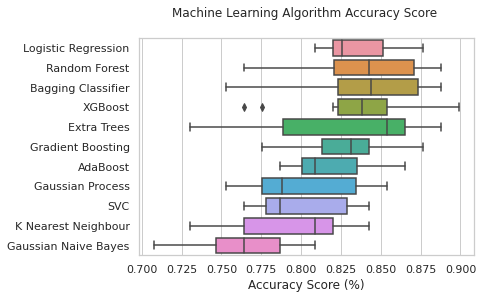

In [325]:
# 결과 테이블 생성
results = pd.DataFrame(scores2).T
results['mean'] = results.mean(1)

result_df = results.sort_values(by='mean', ascending=False)#.reset_index()
result_df.head(11)
result_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)');

# 9.하이퍼 파라미터 튜닝

## SVC(=Support Vector Classification)
- Scikit-Learn에는 3가지 모형 최적화 도구 지원: validation_curve / GridSearchCV / Parameter Grid
- fit메소드를 호출하면 grid search가 자동으로 여러 개의 내부 모형을 생성하고, 이를 모두 실행시켜 최적 파라미터를 탐색
- bestscore는 최고 점수, best estimator는 최고 점수를 낸 파라미터를 가진 모형  


---


- c값과 gamma값은 10의 배수가 일반적
- gamma: 단일 학습 예제의 영향이 도달하는 정도(낮은 값은 far, 높은 값은 close를 나타냄) 서포트 벡터로 모델에 의해 선택된 샘플의 영향 반경의 역으로 볼 수 있음.
- c: 의사 결정 표면의 단순성에 대한 훈련 예제의 오분류 제거. C가 낮을 수록 결정 표면이 매끄러움. 높은 C는 더 많은 샘플을 서포트 벡터가 자유롭게 선택할 수 있도록 하여 모든 학습 예제를 올바르게 분류하는 것을 목표로 함
- Verbose: 불리안 값 입력.  True를 넣으면 다 알려주지만 시간이 오래 걸림
- cv=5: 교차 검증 5번 실시 (5 fold)

In [326]:
# 파라미터 서치
Cs = [0.01, 0.1, 1, 5, 10, 15, 20, 50]
gammas = [0.001, 0.01, 0.1]

# 파라미터 그리드 세팅
hyperparams = {'C':Cs, 'gamma': gammas}

# 교차검증
gd = GridSearchCV(estimator = SVC(probability=True),param_grid=hyperparams,
                  verbose = True, cv = 5, scoring='accuracy', n_jobs=-1)

# 모델 fiting 및 결과
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.3min finished


0.8361308141359614
{'C': 10, 'gamma': 0.001}


- GridSearchCV: 사용자가 지정해준 파라미터 그리터에 존재하는 파라미터 후보들을 사용하여 여러 개의 모형을 생성하고 최적의 parameter를 찾아줌
- 결과: C = 10, gamma = 0.001 값이 최적의 파라미터임

## Gradient Boosting Classifier
- learning_rate: 각 트리의 기여를 줄이는 역할
- n_estimator: 각 경우의 트리 숫자

In [327]:
learning_rate = [0.01, 0.05, 0.1, 0.2, 0.5]
n_estimators = [100,1000,2000]
max_depth = [3, 5, 10, 15]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd = GridSearchCV(estimator=GradientBoostingClassifier(), param_grid=hyperparams,
                  verbose=True, cv=5, scoring='accuracy', n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  5.1min finished


0.8383717280773334
{'learning_rate': 0.5, 'n_estimators': 100}


## Logisitc Regression
- L1을 사용하는 회귀모델을 Lasso Regression, L2를 사용하는 모델을 Ridge Regression이라고 함
- 이 둘의 차이점은 페널티. 릿지회귀는 손실삼수에 페널티항으로 계수의 '제곱 크기' 추가.  
L2-norm이 오차를 제곱하기 때문에 (오류 > 1 인 경우 로트 증가) 모델은 L1-norm보다 훨씬 큰 오차(e vs e^2)를 보게 되므로 훨씬 민감.
- 이 오류를 최소화하기 위해 모델 조정 필요
- C = estimator
- logspace 1차원 10개 배열로 0에서 4까지를 estimator로 놓은 것


In [328]:
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)

hyperparams = {'penalty': penalty, 'C': C}

gd = GridSearchCV(estimator = LogisticRegression(), param_grid = hyperparams,
                  verbose = True, cv = 5, scoring = 'accuracy', n_jobs = -1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8305316678174629
{'C': 3593.813663804626, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished


## XGBoost

- step 1

In [329]:
learning_rate = [0.001, 0.005, 0.01, 0.05, 0.1, 0.2]
n_estimators = [10, 50, 100, 250, 500, 1000]

hyperparams = {'learning_rate': learning_rate, 'n_estimators': n_estimators}

gd = GridSearchCV(estimator = XGBClassifier(), param_grid = hyperparams,
                  verbose = True, cv = 5, scoring = 'accuracy', n_jobs = -1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  4.3min finished


0.8271922666499277
{'learning_rate': 0.1, 'n_estimators': 100}


- step 2

In [330]:
max_depth = [3, 4, 5, 6, 7, 8, 9, 10]
min_child_weight = [1, 2, 3, 4, 5, 6]

hyperparams = {'max_depth': max_depth, 'min_child_weight': min_child_weight}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:   23.3s finished


0.8361433682756889
{'max_depth': 7, 'min_child_weight': 5}


- step 3

In [331]:
gamma = [i*0.1 for i in range(0,5)]

hyperparams = {'gamma': gamma}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.6s finished


0.8283095850856819
{'gamma': 0.0}


- step 4

In [332]:
subsample = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
colsample_bytree = [0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
    
hyperparams = {'subsample': subsample, 'colsample_bytree': colsample_bytree}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 388 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 402 out of 405 | elapsed:   35.5s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   35.7s finished


0.8283095850856819
{'colsample_bytree': 1, 'subsample': 1}


- step 5

In [333]:
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
    
hyperparams = {'reg_alpha': reg_alpha}

gd=GridSearchCV(estimator = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=6, 
                                          min_child_weight=1, gamma=0, subsample=1, colsample_bytree=1),
                                         param_grid = hyperparams, verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    2.5s finished


0.8283095850856819
{'reg_alpha': 1e-05}


## Gaussian Process

In [334]:
n_restarts_optimizer = [0, 1, 2, 3]
max_iter_predict = [1, 2, 5, 10, 20, 35, 50, 100]
warm_start = [True, False]

hyperparams = {'n_restarts_optimizer': n_restarts_optimizer, 'max_iter_predict': max_iter_predict, 'warm_start': warm_start}

gd = GridSearchCV(estimator = GaussianProcessClassifier(), param_grid = hyperparams,
                  verbose = True, cv = 5, scoring = 'accuracy', n_jobs = -1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  7.3min finished


0.8013495700207143
{'max_iter_predict': 1, 'n_restarts_optimizer': 0, 'warm_start': True}


## Adaboost

In [335]:
n_estimators = [10, 100, 200, 500]
learning_rate = [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]

hyperparams = {'n_estimators': n_estimators, 'learning_rate': learning_rate}

gd=GridSearchCV(estimator = AdaBoostClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   38.2s
[Parallel(n_jobs=-1)]: Done 140 out of 140 | elapsed:  1.9min finished


0.8372418555018518
{'learning_rate': 0.5, 'n_estimators': 500}


## KNN
- n_neighbor: k 설정
- weights
  + uniform: default 값. np.mean 함수를 사용하여 단순 평균을 계산
  + distance: 거리를 고려한 가중치 평균. 분류할 때 인접한 샘플의 거리에 따라 다른 가중치 부여 (가까울수록 큰 가중치)
- metric(default='minkowski'): 거리계산의 척도 (minkowski, euclidean, mahalanobis 등)

In [338]:
n_neighbors = [1, 2, 3, 4, 5]
algorithm = ['auto']
weights = ['uniform', 'distance']
leaf_size= [1, 2, 3, 4, 5, 10]

hyperparams = {'algorithm': algorithm, 'weights': weights, 'leaf_size': leaf_size,
              'n_neighbors': n_neighbors}

gd = GridSearchCV(estimator = KNeighborsClassifier(), param_grid = hyperparams,
                  verbose = True, cv = 5,scoring = 'accuracy', n_jobs = -1)

# fitting model and retrun results
gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   22.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.0min


0.8227041616973197
{'algorithm': 'auto', 'leaf_size': 1, 'n_neighbors': 4, 'weights': 'distance'}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.3min finished


## Random Forest
- n_estimators = 결정트리의 갯수를 지정. (default = 10)
- max_depth = 트리의 최대 깊이 (default = None) ->  완벽하게 클래스 값이 결정될 때 까지 분할
- min_samples_split = 노드를 분할하기 위한 최소한의 샘플 데이터수
- min_samples_leaf = 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수

In [339]:
n_estimators = [10, 50, 100, 200]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 6]
min_samples_leaf = [2, 6]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = RandomForestClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:   11.3s
[Parallel(n_jobs=-1)]: Done 326 tasks      | elapsed:   59.0s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  2.3min finished


0.8361370912058252
{'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 6, 'min_samples_split': 2, 'n_estimators': 200}


## Extra Trees

In [340]:
n_estimators = [10, 25, 50, 75, 100]
max_depth = [3, None]
max_features = [0.1, 0.2, 0.5, 0.8]
min_samples_split = [2, 10]
min_samples_leaf = [2, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

gd=GridSearchCV(estimator = ExtraTreesClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 160 candidates, totalling 800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 356 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 800 out of 800 | elapsed:  1.7min finished


0.8350134957002071
{'max_depth': None, 'max_features': 0.2, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 75}


## Bagging Classifier

In [341]:
n_estimators = [10, 50, 75, 100, 200]
max_samples = [0.1, 0.2, 0.5, 0.8, 1.0]
max_features = [0.1, 0.2, 0.5, 0.8, 1.0]

hyperparams = {'n_estimators': n_estimators, 'max_samples': max_samples, 'max_features': max_features}

gd=GridSearchCV(estimator = BaggingClassifier(), param_grid = hyperparams, 
                verbose=True, cv=5, scoring = "accuracy", n_jobs=-1)

gd.fit(X_train, y_train)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 125 candidates, totalling 625 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 625 out of 625 | elapsed:  3.2min finished


0.8406000878789781
{'max_features': 1.0, 'max_samples': 0.8, 'n_estimators': 75}


# 10.모델 재 트레이닝

In [343]:
# 튜닝 모델 시작
# sample을 split하는 것은 전체데이터 80%를 트레인셋에, 20%는 테스트셋에 할당
ran = RandomForestClassifier(max_depth=None, max_features=0.2, min_samples_leaf=6, min_samples_split=2, n_estimators=200, random_state=1)

knn = KNeighborsClassifier(leaf_size=1, n_neighbors=4, weights='distance')

log = LogisticRegression(C= 3593.813663804626, penalty='l2')

xgb = XGBClassifier(learning_rate=0.2, n_estimators=10, max_depth=7, 
                                          min_child_weight=5, gamma=0, subsample=1, colsample_bytree=1, reg_alpha=1e-05)

gbc = GradientBoostingClassifier(learning_rate=0.5, max_depth=3, n_estimators=100)

svc = SVC(probability=True, gamma=0.001, C=10)

ext = ExtraTreesClassifier(max_depth=None, max_features=0.2, min_samples_leaf=10, min_samples_split=2, n_estimators=75, random_state=1)

ada = AdaBoostClassifier(learning_rate=0.5, n_estimators=500, random_state=1)

gpc = GaussianProcessClassifier(max_iter_predict=1, n_restarts_optimizer=0, warm_start=True)

bag = BaggingClassifier(max_features=1.0, max_samples=0.8, n_estimators=75, random_state=1)

# 리스트
models = [ran, knn, log, xgb, gbc, svc, ext, ada, gnb, gpc, bag]         
model_names = ['Random Forest', 'K Nearest Neighbour', 'Logistic Regression', 'XGBoost', 'Gradient Boosting', 'SVC', 'Extra Trees', 'AdaBoost', 'Gaussian Naive Bayes', 'Gaussian Process', 'Bagging Classifier']
scores3 = {}

# Sequentially fit and cross validate all models
for ind, mod in enumerate(models):
    mod.fit(X_train, y_train)
    acc = cross_val_score(mod, X_train, y_train, scoring = "accuracy", cv = 10)
    scores3[model_names[ind]] = acc

Text(0.5, 0, 'Accuracy Score(%)')

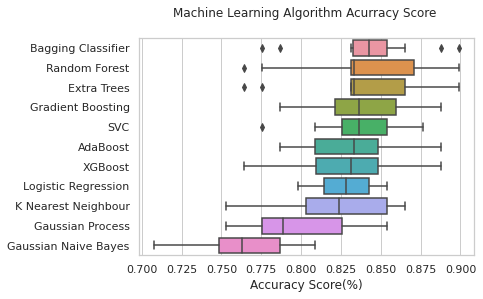

In [351]:
results = pd.DataFrame(scores3).T
results['mean'] = results.mean(1)
result_df = results.sort_values(by='mean', ascending=False)
result_df.head(11)

reuslt_df = result_df.drop(['mean'], axis=1)
sns.boxplot(data=result_df.T, orient='h')
plt.title('Machine Learning Algorithm Acurracy Score \n')
plt.xlabel('Accuracy Score(%)')

In [354]:
result_df[['mean']]

,mean
Bagging Classifier,0.840637
Random Forest,0.839513
Extra Trees,0.838390
Gradient Boosting,0.836167
SVC,0.836142
AdaBoost,0.835019
XGBoost,0.829451
Logistic Regression,0.828290
K Nearest Neighbour,0.823845
Gaussian Process,0.799114


## 11.마지막 보팅
- hard voting: 단순하게 가장 많은 표를 얻은 결과를 선택
- soft voting: 각 class별로 모델들이 예측한 probability를 합산해서 가장 높은 class를 선택

In [352]:
#튜닝한 파라미터로 하드보팅
grid_hard = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'hard')

grid_hard_cv = model_selection.cross_validate(grid_hard, X_train, y_train, cv=10)
grid_hard.fit(X_train, y_train)

print("Hard voting on test set score mean: {:.2f}". format(grid_hard_cv['test_score'].mean() * 100))

Hard voting on test set score mean: 84.62


In [355]:
#튜닝한 파라미터로 소프트보팅
grid_soft = VotingClassifier(estimators = [('Random Forest', ran), 
                                           ('Logistic Regression', log),
                                           ('XGBoost', xgb),
                                           ('Gradient Boosting', gbc),
                                           ('Extra Trees', ext),
                                           ('AdaBoost', ada),
                                           ('Gaussian Process', gpc),
                                           ('SVC', svc),
                                           ('K Nearest Neighbour', knn),
                                           ('Bagging Classifier', bag)], voting = 'soft')

grid_soft_cv = model_selection.cross_validate(grid_soft, X_train, y_train, cv=10)
grid_soft.fit(X_train, y_train)

print("Soft voting on test set score mean: {:.2f}". format(grid_soft_cv['test_score'].mean() * 100))

Soft voting on test set score mean: 84.74


# 12.마지막 모델 예측

In [363]:
# Final predictions (하드보팅)
predictions = grid_hard.predict(X_test)

submission = pd.concat([pd.DataFrame(passid), pd.DataFrame(predictions)], axis = 'columns')

submission.columns = ["PassengerId", "Survived"]
submission.to_csv('titanic_submission1.csv', header = True, index = False)

In [364]:
# Final predictions (소프트보팅)
predictions = grid_soft.predict(X_test)

submission = pd.concat([pd.DataFrame(passid), pd.DataFrame(predictions)], axis = 'columns')

submission.columns=['PassengerId', 'Survived']
submission.to_csv('titanic_submisson2.csv', header=True, index=False)

## 13.제출